# Tradewalk DS Assessment

## 1. Importing Necessary Libraries

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


## 2. Loading the dataset

In [101]:
df = pd.read_csv('books.csv')

In [86]:
df.sample(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
68,1333,10883,10883,750514,30,074325807X,9.780743e+12,Walter Isaacson,2003.0,Benjamin Franklin: An American Life,...,71804,1386,3086,3391,13181,25649,26497,https://images.gr-assets.com/books/1397772877m...,https://images.gr-assets.com/books/1397772877s...,0
93,1978,14241,14241,1269768,34,143035746,9.780143e+12,Mary Karr,1995.0,The Liars' Club: A Memoir,...,47561,2259,950,2756,10793,17561,15501,https://images.gr-assets.com/books/1499665766m...,https://images.gr-assets.com/books/1499665766s...,0
41,787,7821447,7821447,10860635,39,61992704,9.780062e+12,Justin Halpern,2010.0,Sh*t My Dad Says,...,116368,7386,2279,6246,25054,40835,41954,https://images.gr-assets.com/books/1370399211m...,https://images.gr-assets.com/books/1370399211s...,0
305,7259,6818019,6818019,7026660,47,307589676,9.780308e+12,"Nujood Ali, Delphine Minoui, Linda Coverdale",2009.0,"Moi Nojoud, 10 ans, divorcée",...,15351,2294,169,1002,4480,5895,3805,https://images.gr-assets.com/books/1320467214m...,https://images.gr-assets.com/books/1320467214s...,0
124,2702,6114607,6114607,6292672,4,143116231,9.780143e+12,Jennifer Worth,2002.0,Call the midwife : a true story of the East En...,...,39141,5112,291,809,5844,17076,15121,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


## Q1. How many rows and columns are there in books.csv dataset?



In [87]:
rows = df.shape[0]
columns = df.shape[1]
print(f'There are {rows} rows and {columns} columns in the book dataset')

There are 399 rows and 24 columns in the book dataset


## Q2. How many books do not have an original title?



In [88]:
# checking for Null values
df.isnull().sum() 

book_id                       0
goodreads_book_id             0
best_book_id                  0
work_id                       0
books_count                   0
isbn                         11
isbn13                       10
authors                       0
original_publication_year     0
original_title               36
title                         0
language_code                43
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
NonEnglish                    0
dtype: int64

In [89]:
# Get the list of columns with null values and their counts
null_counts = df.isnull().sum()
columns_with_null = null_counts[null_counts > 0].index.tolist()

# Display data types and counts of null values for columns with null values
for column in columns_with_null:
    print(f"{column}: {df[column].dtype} - Null Count: {null_counts[column]}")

isbn: object - Null Count: 11
isbn13: float64 - Null Count: 10
original_title: object - Null Count: 36
language_code: object - Null Count: 43


In [104]:
# Books with no original title

books_with_no_title = df[df['original_title'].isnull()].shape[0]
print(f"Books with no original title: {books_with_no_title}")

Books with no original title: 36


## Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [110]:
# First finding total number of Unique book ids in the dataset

unique_ids = df['book_id'].unique()
print(f"There are {len(unique_ids)} unique books in the dataset")
print("........")
random_ids = random.sample(list(unique_ids), 5)
print(f"Random 5 from the list: {random_ids}")


There are 399 unique books in the dataset
........
Random 5 from the list: [2288, 1515, 8901, 144, 4478]


In [105]:
# Assigning "Not provided" to the null values in the original_title column

df['original_title'].fillna("Not provided", inplace=True)

# Crosschecking NULL values in the original_title column
books_with_no_title = df[df['original_title'].isnull()].shape[0]
print(f"Books with no original title: {books_with_no_title}")

In [112]:
# Find the number of unique book ids in the dataset after removing the null values in the original_title column

unique_ids = df[df['original_title'] != "Not provided"]['book_id'].unique()
print(f"There are {len(unique_ids)} unique books in the dataset after removing the null values in the original_title column")
print("........")
random_ids = random.sample(list(unique_ids), 5)
print(f"Random 5 from the list: {random_ids}")

There are 363 unique books in the dataset
........
Random 5 from the list: [9522, 2885, 2788, 1031, 3142]


## Q4. What is the average rating of all the books in the dataset based on ‘average_rating’?



In [113]:
average_rating = df['average_rating'].mean()

print(f"The average rating of all books in the dataset is: {average_rating}")

The average rating of all books in the dataset is: 3.9837844611528817


## Q5. Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.


In [133]:
books_published_in_2000 = df[df['original_publication_year'] == 2000].shape[0]

print(f"The number of books published in the year 2000 is: {books_published_in_2000}")

The number of books published in the year 2000 is: 8


## Q6. Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.



In [134]:
max_ratings_book_title = df.loc[df['work_ratings_count'].idxmax()]['title']
max_ratings_book = df['work_ratings_count'].max()

print(f"The book with the highest number of ratings is '{max_ratings_book_title}' with '{max_ratings_book}' ratings")

The book with the highest number of ratings is 'The Diary of a Young Girl' with '2024493' ratings


## Q7. Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [136]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Create a new column 'rating_bucket' based on the bins
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right=False)

# Group by 'rating_bucket' and count the number of books in each bucket
bucket_counts = df.groupby('rating_bucket').size().reset_index(name='count')



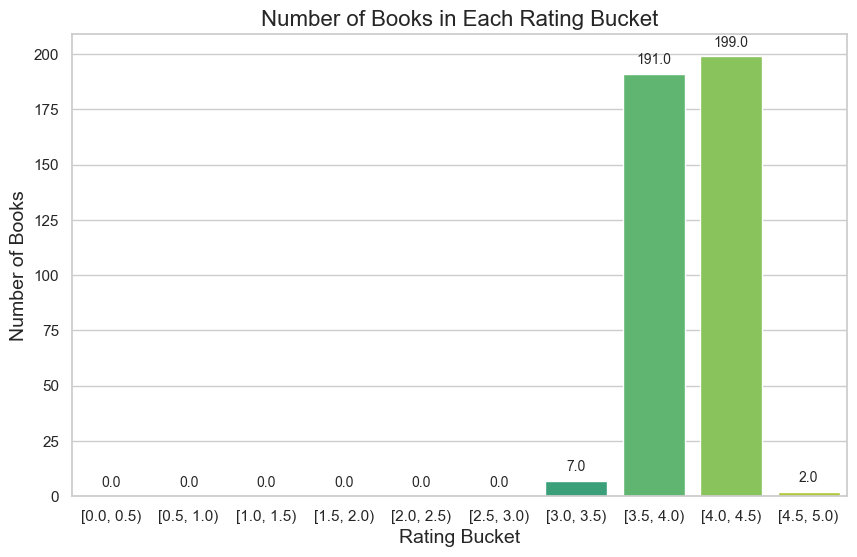

In [135]:
# Set the style using seaborn
sns.set(style="whitegrid")

# Plot a bar graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='rating_bucket', y='count', data=bucket_counts, palette='viridis')

# Add labels and title
plt.xlabel('Rating Bucket', fontsize=14)
plt.ylabel('Number of Books', fontsize=14)
plt.title('Number of Books in Each Rating Bucket', fontsize=16)

# Display the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Show the plot
plt.show()